<a href="https://colab.research.google.com/github/gpasky/MAT-421/blob/main/ModF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Pascual

**20.1 Numerical Differentiation Problem Statement**

Numerical Grid: An evenly spaced set of points over a functions domain (independent variable), over some interval [a,b].

*   The step size is the distance between adjacent points on the numerical grid

*   A numerical grid contains $j$ points and $h$ represents the space between each point, $x_j-1$ and $x_j$.

A numerical grid in one dimension can be represented using linspace in Python.

Ex:

In [ ]:
import numpy as np

arr = np.linspace(0,20)
print(arr)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


**20.2 Finite Difference Approximating Derivatives**

Finite Difference Approximations: We can approximate by using values of the function near $x=a$ where the derivative of the function at $x=a$ is


*   $f'(a)=\lim_{x\to a}\frac{f(x)-f(a)}{x-a}$

Forward Difference: Estimates the slope of the function at $x_j$ using $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$

$f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$

Backward Difference: Estimates the slope of the function at $x_j$ using $(x_{j-1},f(x_{j-1}))$ and $(x_j,f(x_j))$

$f'(x_j)=\frac{f(x_{j})-f(x_{j-1})}{x_j-x_{j-1}}$

Central difference: Estimates the slope of the function at $x_j$ using $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$

$f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

Approximating Derivatives with Taylor Series:

We can derive a function f(x) around $a=x_j$ and approximate.

We compute the Taylor series and derive using $x=x_j$ with spacing $h=x_{j+1}-x_j$ to get the forward difference formula:

*   $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{h}$

We can also compute the Taylor series with $a=x_j$ at $x=x_{j-1}$ and solve for the derivative to get the backward difference formula:

*   $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{h}$

Solving for the Taylor series near $a=x_j$ at $x_{j+1}$ and $x_{j-1}$ then solving for the derivative gives the central diffference formula:

*   $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{2h}$

Here is an example for finding the finite difference approximation of $f(x)=sin(x)$:

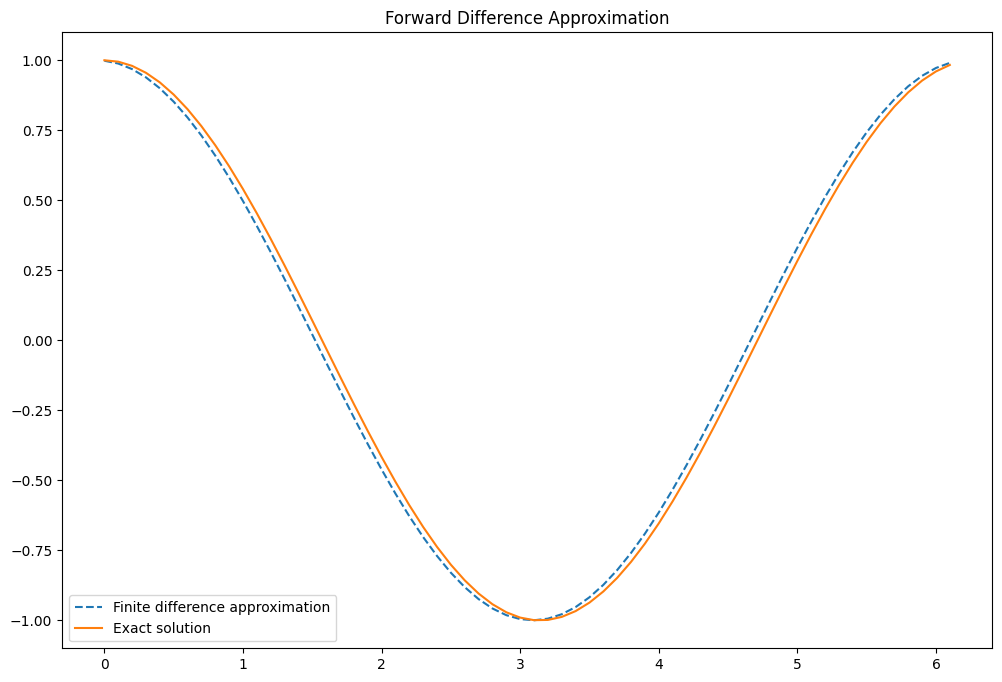

Max Error:  0.04997515074549317


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = 0.1
x = np.arange(0, 2*np.pi, h)

y = np.sin(x)

forward_diff = np.diff(y)/h
x_diff = x[:-1:]

exact_solution = np.cos(x_diff)

plt.figure(figsize=(12,8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.title('Forward Difference Approximation')
plt.legend()
plt.show()

max_error = max(abs(exact_solution - forward_diff))
print('Max Error: ',max_error)

**20.3 Approximating of Higher Order Derivatives**

Take the Taylor series near $a=x_j$ at $x=x_{j-1}$ and $x_{j+1}$ to get $f(x_{j-1})$ and $f(x_{j+1})$.

Then,

$f(x_{j-1})+f(x_{j+1})=2f(x_j)+h^2f''(x_j)+\frac{h^4f''''(x_j)}{24}+...$

Gives:

$f''(x_j)≈\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}$

**20.4 Numerical Differentiation with Noise**

Data may be affected by noise which may cause inaccurate values to occur compared to what its value would be coming from a pure mathematical function. This change in data may come from external factors outside of the system or from measurement devices.

An example is made to show how a function such as $f(x) = sin(x)$ and $f_{ϵ,ω}=sin(x)+ ϵcos(ωx)$ is affected by noise:

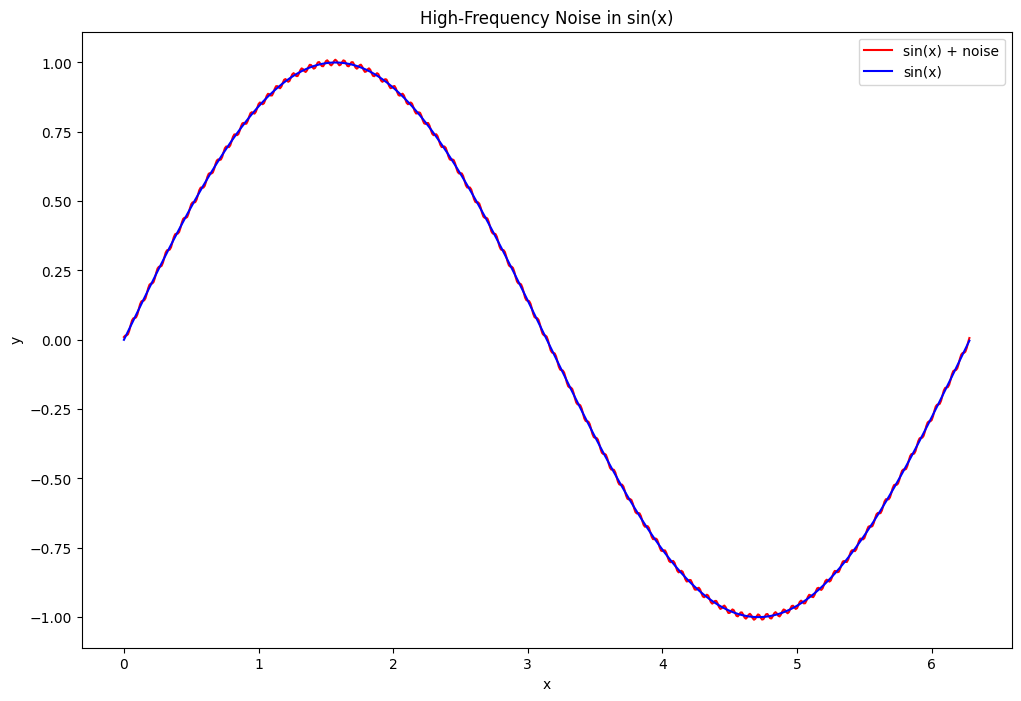

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)

omega = 100
epsilon = 0.01

y = np.sin(x)
y_noise = y + epsilon*np.cos(omega*x)

plt.figure(figsize = (12,8))
plt.plot(x, y_noise, 'r-', \
         label = 'sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.title('High-Frequency Noise in sin(x)')
plt.legend()
plt.show()